# Capstone Week 2
---

## Capstone Objectives:
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

pd.set_option('display.max_columns', 50)

## Remember the data science workflow
<img src="../data_science_workflow.png" width="400px">

# Read in Data

In [2]:
df18 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions19")

In [3]:
df19.head(2)

,CONTACT_ID,sales_12M,new_Fund_added_12M,refresh_date
0,10761171685327323628,4484.2,NaN,2019-12-31
1,85102132684855362312,NaN,NaN,2019-12-31


In [4]:
df18.head(2)

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,8.0,1.0,237480.11,250.0,19682.0,-1496.745,-102496.165,NaN,-47342.32,284737.93,84.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19629.00,NaN,NaN,NaN,NaN,NaN,0.00,19629.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31


## Merge 2018 and 2019

In [5]:
print(df18.shape)
print(df19.shape)

(10005, 38)
(10005, 4)


In [6]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [7]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_2018,sales_12M_2019,new_Fund_added_12M_2019,refresh_date_2019
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,8.0,1.0,237480.11,250.0,19682.0,-1496.745,-102496.165,NaN,-47342.32,284737.93,84.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31,18633.105,NaN,2019-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19629.00,NaN,NaN,NaN,NaN,NaN,0.00,19629.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1758.70,NaN,NaN,NaN,NaN,NaN,0.00,1758.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,57943.00,5459.0,52484.0,NaN,NaN,1.0,0.00,0.00,57943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31,93212.000,1.0,2019-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8573.59,NaN,NaN,NaN,NaN,NaN,-8573.59,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31


Make dictionary to make row labels back to CONTACT_ID

In [23]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

# Data Cleaning

Before you change ANYTHING with the data, do your train-test split

In [8]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y = df['sales_12M_2019']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [14]:
X_train['refresh_date_2019'].value_counts()

2019-12-31    7503
Name: refresh_date_2019, dtype: int64

Let's create functions that do some basic housekeeping

In [12]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID',
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [15]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()

In [16]:
X_train1 = extract_columns(X_train)
X_train1.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
4081,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,30837.46,23.95,167.57,NaN,NaN,1.0,0.00,30645.94,0.0,0.0,0.00,0.00,0.0,191.52,191.52,0.0,0.0,0.0,30645.94,0.00,0.0,0.00
184,27.0,7.0,NaN,1.0,6.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,12.0,2.0,-90841.55,230.79,16380.65,NaN,-62861.42,5.0,112664.50,-250621.31,0.0,0.0,0.00,0.00,0.0,47115.26,47115.26,0.0,0.0,0.0,-268165.38,-178243.12,0.0,308451.69
186,3.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,1.0,4330024.49,NaN,551269.50,NaN,NaN,NaN,4501498.80,0.00,0.0,0.0,-171474.31,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,4330024.49,0.0,0.00
230,42.0,14.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,-4025438.07,NaN,83491.48,NaN,-198505.61,NaN,50498.62,-4069339.40,0.0,0.0,0.00,-6597.29,0.0,0.00,0.00,0.0,0.0,0.0,-92122.39,-4069339.40,0.0,136023.72
6327,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-52438.02,NaN,NaN,NaN,-3808.12,NaN,-3808.12,-48629.90,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,-52438.02,0.00,0.0,0.00


Let's check out those missing values again

In [29]:
X_train1.isnull().sum()

no_of_sales_12M_1                      3906
no_of_Redemption_12M_1                 3468
no_of_sales_12M_10K                    5453
no_of_Redemption_12M_10K               5281
no_of_funds_sold_12M_1                 3906
no_of_funds_redeemed_12M_1             3468
no_of_fund_sales_12M_10K               5453
no_of_funds_Redemption_12M_10K         5281
no_of_assetclass_sold_12M_1            3906
no_of_assetclass_redeemed_12M_1        3468
no_of_assetclass_sales_12M_10K         5453
no_of_assetclass_Redemption_12M_10K    5281
No_of_fund_curr                        2825
No_of_asset_curr                       3287
AUM                                     434
sales_curr                             5664
sales_12M_2018                         3901
redemption_curr                        5567
redemption_12M                         3452
new_Fund_added_12M_2018                5462
aum_AC_EQUITY                           434
aum_AC_FIXED_INCOME_MUNI                434
aum_AC_FIXED_INCOME_TAXABLE     

Make function to fill those missing values with `0`. We can refactor this function later if we like.

In [30]:
def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)

In [31]:
X_train2 = fillna_values(X_train1)
y_train = fillna_values(y_train)

In [32]:
X_train2.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
4081,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,30837.46,23.95,167.57,0.0,0.00,1.0,0.00,30645.94,0.0,0.0,0.00,0.00,0.0,191.52,191.52,0.0,0.0,0.0,30645.94,0.00,0.0,0.00
184,27.0,7.0,0.0,1.0,6.0,5.0,0.0,1.0,2.0,2.0,0.0,1.0,12.0,2.0,-90841.55,230.79,16380.65,0.0,-62861.42,5.0,112664.50,-250621.31,0.0,0.0,0.00,0.00,0.0,47115.26,47115.26,0.0,0.0,0.0,-268165.38,-178243.12,0.0,308451.69
186,3.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4330024.49,0.00,551269.50,0.0,0.00,0.0,4501498.80,0.00,0.0,0.0,-171474.31,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,4330024.49,0.0,0.00
230,42.0,14.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,-4025438.07,0.00,83491.48,0.0,-198505.61,0.0,50498.62,-4069339.40,0.0,0.0,0.00,-6597.29,0.0,0.00,0.00,0.0,0.0,0.0,-92122.39,-4069339.40,0.0,136023.72
6327,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-52438.02,0.00,0.00,0.0,-3808.12,0.0,-3808.12,-48629.90,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,-52438.02,0.00,0.0,0.00


In [33]:
X_train2.isnull().sum()

no_of_sales_12M_1                      0
no_of_Redemption_12M_1                 0
no_of_sales_12M_10K                    0
no_of_Redemption_12M_10K               0
no_of_funds_sold_12M_1                 0
no_of_funds_redeemed_12M_1             0
no_of_fund_sales_12M_10K               0
no_of_funds_Redemption_12M_10K         0
no_of_assetclass_sold_12M_1            0
no_of_assetclass_redeemed_12M_1        0
no_of_assetclass_sales_12M_10K         0
no_of_assetclass_Redemption_12M_10K    0
No_of_fund_curr                        0
No_of_asset_curr                       0
AUM                                    0
sales_curr                             0
sales_12M_2018                         0
redemption_curr                        0
redemption_12M                         0
new_Fund_added_12M_2018                0
aum_AC_EQUITY                          0
aum_AC_FIXED_INCOME_MUNI               0
aum_AC_FIXED_INCOME_TAXABLE            0
aum_AC_MONEY                           0
aum_AC_MULTIPLE 

## Standardize Data

In [34]:
ss = StandardScaler()
X_train3 = pd.DataFrame(
    ss.fit_transform(X_train2),
    index=X_train2.index,
    columns=X_train2.columns)
X_train3.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
4081,-0.131327,-0.100418,-0.210641,-0.198657,-0.153437,-0.626787,-0.430000,-0.441804,0.201462,-0.868033,-0.534630,-0.562039,-0.372488,0.065543,-0.088949,-0.083247,-0.154606,0.090417,0.156246,0.436844,-0.026493,-0.070601,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040002,-0.070366,-0.030628,-0.093547,-0.018485,-0.056351,-0.057933,-0.016559,-0.070033
184,0.064598,-0.068134,-0.210641,-0.087441,1.954284,1.399401,-0.430000,0.296800,1.188127,1.034363,-0.534630,0.777535,3.177868,1.018590,-0.124508,-0.082219,-0.139641,0.090417,0.071676,3.848384,0.050153,-0.166822,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,0.047651,1.121516,-0.030628,-0.093547,-0.018485,-0.160696,-0.158246,-0.016559,3.269629
186,-0.170512,-0.100418,-0.024389,-0.198657,-0.153437,-0.626787,0.320475,-0.441804,0.201462,-0.868033,0.857226,-0.562039,-0.049728,0.065543,1.167409,-0.083366,0.354063,0.090417,0.156246,-0.416042,3.035922,-0.081085,-0.059801,-0.012455,-0.689998,-0.041821,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.067053,2.378954,-0.016559,-0.070033
230,0.211542,-0.035851,-0.117515,-0.087441,-0.153437,0.183688,0.320475,0.296800,0.201462,1.034363,0.857226,0.777535,-0.049728,0.065543,-1.274321,-0.083366,-0.077698,0.090417,-0.110813,-0.416042,0.007861,-1.473199,-0.059801,-0.012455,-0.023802,-0.311608,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.099222,-2.348109,-0.016559,1.402720
6327,-0.199901,-0.095806,-0.210641,-0.198657,-0.574981,-0.221549,-0.430000,-0.441804,-0.785202,0.083165,-0.534630,-0.562039,-0.695247,-0.887503,-0.113285,-0.083366,-0.154761,0.090417,0.151123,-0.416042,-0.029084,-0.097721,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.085364,-0.057933,-0.016559,-0.070033


## Create Pipeline
1. `extract_columns` to drop unneeded columns
2. `fillna_values` to replace nans with 0
3. Standardize data

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [36]:
extract_columns_trans = FunctionTransformer(extract_columns, validate=False)
fillna_values_trans = FunctionTransformer(fillna_values, validate=False)

In [44]:
X_train.head(2)

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_2018,refresh_date_2019
4081,85201151104552899957,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,30837.46,23.95,167.57,NaN,NaN,1.0,0.0,30645.94,0.0,0.0,0.0,0.0,0.0,191.52,191.52,0.0,0.0,0.0,30645.94,0.00,0.0,0.00,2018-12-31,2019-12-31
184,0210460,27.0,7.0,NaN,1.0,6.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,12.0,2.0,-90841.55,230.79,16380.65,NaN,-62861.42,5.0,112664.5,-250621.31,0.0,0.0,0.0,0.0,0.0,47115.26,47115.26,0.0,0.0,0.0,-268165.38,-178243.12,0.0,308451.69,2018-12-31,2019-12-31


In [43]:
fillna_values_trans.transform(X_train).head(2)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,CONTACT_ID,refresh_date_2018,refresh_date_2019
4081,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,30837.46,23.95,167.57,0.0,0.00,1.0,0.0,30645.94,0.0,0.0,0.0,0.0,0.0,191.52,191.52,0.0,0.0,0.0,30645.94,0.00,0.0,0.00,85201151104552899957,2018-12-31,2019-12-31
184,27.0,7.0,0.0,1.0,6.0,5.0,0.0,1.0,2.0,2.0,0.0,1.0,12.0,2.0,-90841.55,230.79,16380.65,0.0,-62861.42,5.0,112664.5,-250621.31,0.0,0.0,0.0,0.0,0.0,47115.26,47115.26,0.0,0.0,0.0,-268165.38,-178243.12,0.0,308451.69,0210460,2018-12-31,2019-12-31


In [45]:
pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('lr', LinearRe)
])

In [53]:
pipe.fit(X_train, y_train).transform(X_train)

In [48]:
X_train4 = pd.DataFrame(
    pipe.fit(X_train, y_train).transform(X_train),
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [52]:
pipe.transform(X_test)

# Model Building

In [68]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [55]:
dummy = DummyRegressor()
dummy.fit(X_train4, y_train)
dummy.score(X_train4, y_train)

0.0

In [83]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

In [90]:
pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('RFE', RFECV(LinearRegression(), cv=5))
#     ('PCA', PCA(n_components=0.8)),
#     ('lr', LinearRegression())
])

In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x12138e5e0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x123e17ca0>)),
                ('StandardScaler', StandardScaler()),
                ('RFE', RFECV(cv=5, estimator=LinearRegression()))])

In [92]:
pipe.score(X_train, y_train)

0.5654529219263739

In [93]:
pipe.score(X_test, y_test.fillna(0))

-0.1229801976934326

In [96]:
pipe.named_steps['RFE'].n_features_

21

In [101]:
pipe.named_steps['RFE'].support_

36

In [104]:
X_train[COLS_TO_KEEP].columns[pipe.named_steps['RFE'].support_]

Index(['no_of_sales_12M_10K', 'no_of_Redemption_12M_10K', 'AUM', 'sales_curr',
       'sales_12M_2018', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'],
      dtype='object')

In [107]:
y_test_preds = pipe.predict(X_test)

Text(0, 0.5, 'Predicted')

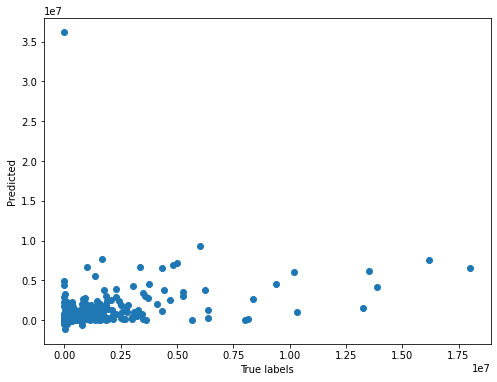

In [112]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(y_test.fillna(0), y_test_preds);
axes.set_xlabel("True labels")
axes.set_ylabel("Predicted")

In [116]:
pd.Series(y_test_preds, index=y_test.index).idxmax()

9888